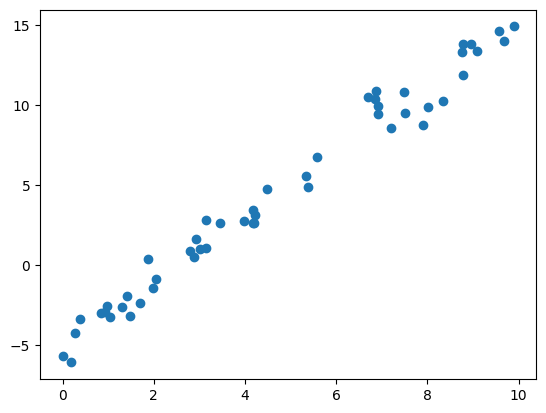

In [175]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [177]:
x_reshaped = x.reshape(-1, 1)

# linear regression model
lin_reg = LinearRegression()
lin_reg.fit(x_reshaped, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [178]:
# Predictions
y_pred_lin = lin_reg.predict(x_reshaped)

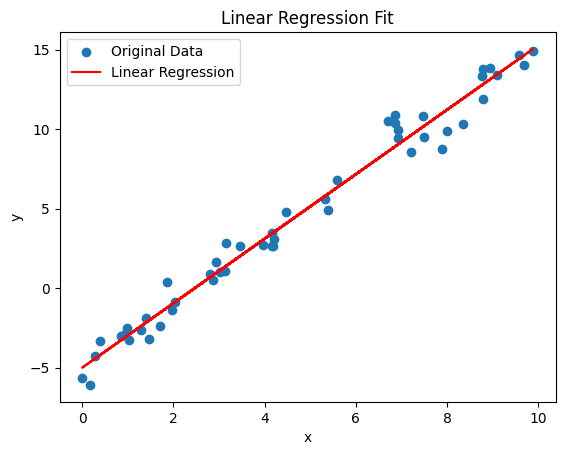

In [179]:
# Plotting
plt.scatter(x, y, label="Original Data")
plt.plot(x, y_pred_lin, color="red", label="Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

In [180]:
# MSE and R2 Score
mse_lin = mean_squared_error(y, y_pred_lin)
r2_lin = r2_score(y, y_pred_lin)

print(f"Linear Regression MSE: {mse_lin:.4f}")
print(f"Linear Regression R² Score: {r2_lin:.4f}")

Linear Regression MSE: 0.8183
Linear Regression R² Score: 0.9791


In [181]:
# Linear SVM regression
from sklearn.svm import SVR

# Fit SVM with linear 
svr_lin = SVR(kernel='linear', C=1000)
svr_lin.fit(x_reshaped, y)

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1000
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [182]:
# Prediction
y_pred_svr = svr_lin.predict(x_reshaped)

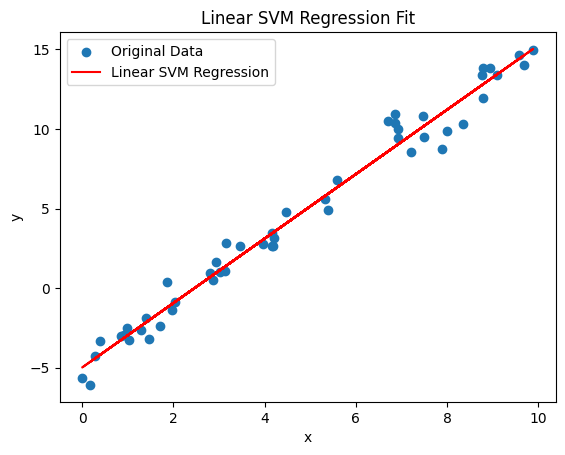

In [183]:
# Plotting
plt.scatter(x, y, label="Original Data")
plt.plot(x, y_pred_svr, color="red", label="Linear SVM Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear SVM Regression Fit")
plt.legend()
plt.show()

In [184]:
# MSE and R2 Score
mse_svr = mean_squared_error(y, y_pred_svr)
r2_svr = r2_score(y, y_pred_svr)

print(f"SVM Regression MSE: {mse_svr:.4f}")
print(f"SVM Regression R² Score: {r2_svr:.4f}")

SVM Regression MSE: 0.8185
SVM Regression R² Score: 0.9791


=================================================================================================================

=================================================================================================================

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=4, random_state=0, cluster_std=1.0)

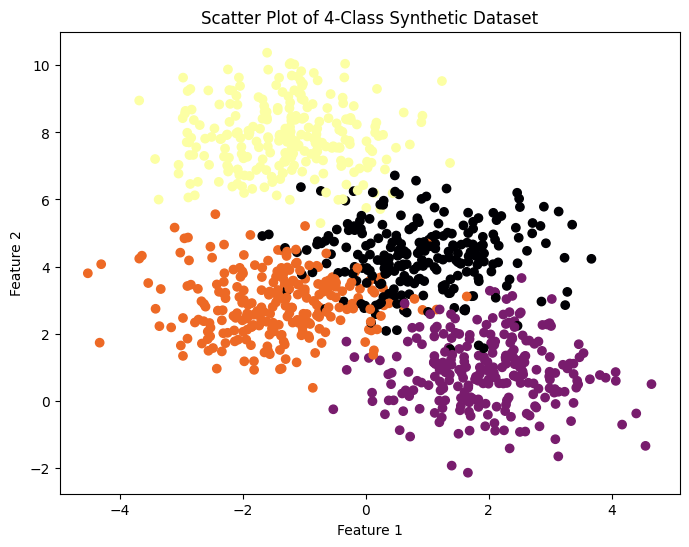

In [186]:
## i) Show the scatter plot of the dataset (each class patterns from a different color)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='inferno')
plt.title("Scatter Plot of 4-Class Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [187]:
## ii) Split the dataset into 75% training and 25% testing patterns.
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [188]:
## iii) Apply standard scaler function to normalize the data as per normal distribution.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_1)
X_test_scaled = scaler.transform(X_test_1)

In [189]:
## iv) Apply logistic regression to classify the data into respective classes. 
## Make use of an appropriate function to show the decision boundaries. Also show the classification report and Confusion matrix.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Fit logistic regression
log_reg = LogisticRegression(multi_class='ovr')
log_reg.fit(X_train_scaled, y_train_1)
y_pred_log = log_reg.predict(X_test_scaled)

C:\Users\g677072\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        63
           1       0.95      0.94      0.94        62
           2       0.87      0.92      0.89        63
           3       0.98      1.00      0.99        62

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

Confusion Matrix:


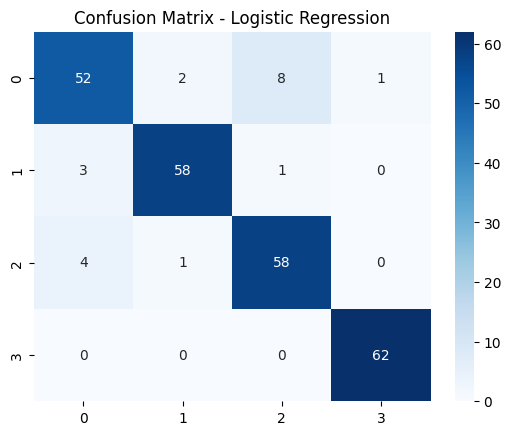

In [190]:
# Classification Report & Confusion Matrix
print("Logistic Regression Classification Report:\n")
print(classification_report(y_test_1, y_pred_log))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test_1, y_pred_log), annot=True,  cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

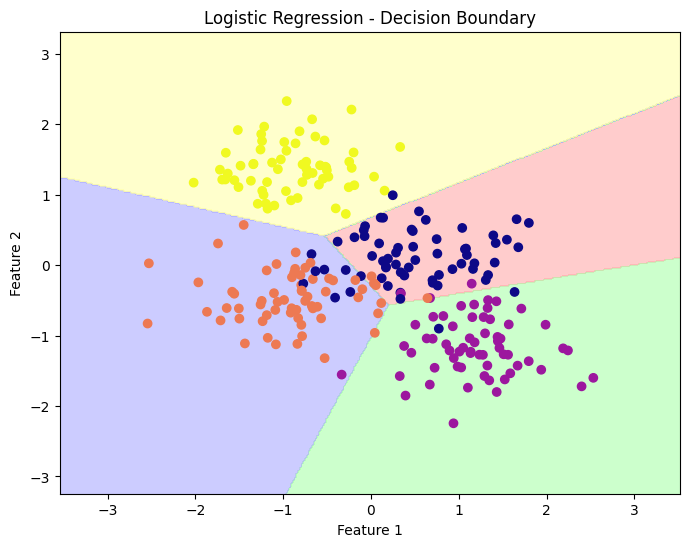

(250, 2)
(143,)


In [195]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA']), alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(log_reg, X_test_scaled, y_test_1, "Logistic Regression - Decision Boundary")

In [197]:
## v) Apply nonlinear-SVM to classify the test data into respective classes. 
## Make use of RBF kernel. Plot the decision boundaries. Also show the classification report and Confusion matrix.

from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf', gamma='scale')
svm_rbf.fit(X_train_scaled, y_train_1)
y_pred_svm = svm_rbf.predict(X_test_scaled)

SVM (RBF) Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        63
           1       0.95      0.95      0.95        62
           2       0.89      0.90      0.90        63
           3       0.97      1.00      0.98        62

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



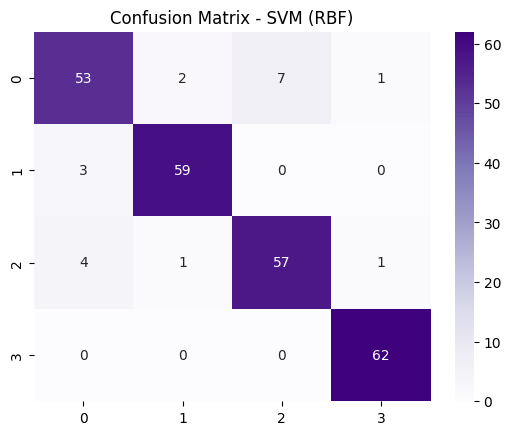

In [199]:
# PLotting and Matrix
print("SVM (RBF) Classification Report:\n")
print(classification_report(y_test_1, y_pred_svm))
sns.heatmap(confusion_matrix(y_test_1, y_pred_svm), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - SVM (RBF)")
plt.show()

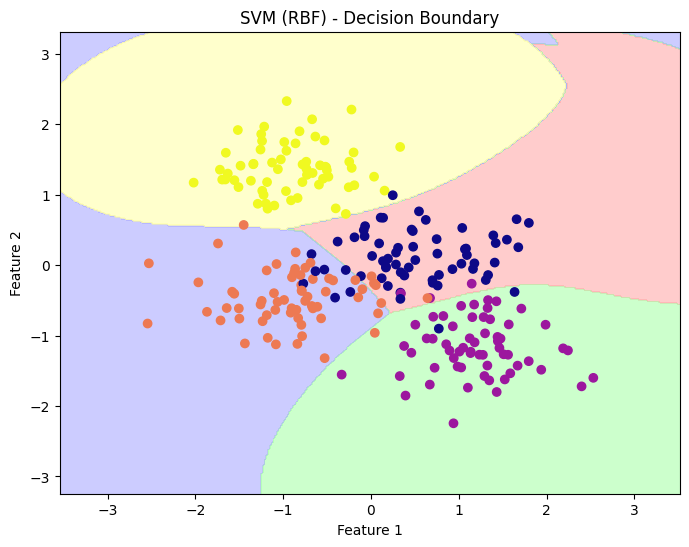

In [200]:
# Decision Boundary
plot_decision_boundary(svm_rbf, X_test_scaled, y_test_1, "SVM (RBF) - Decision Boundary")

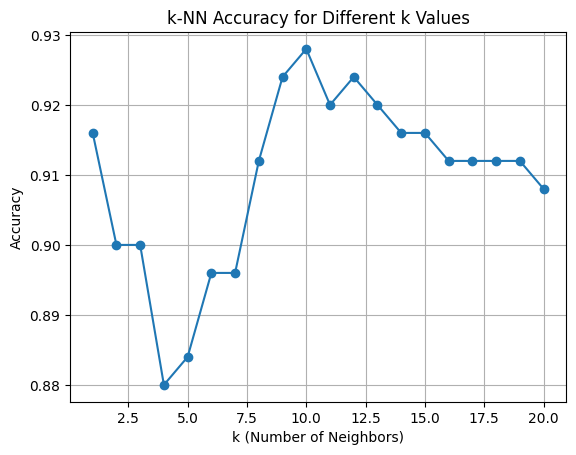

In [203]:
## vi) Apply k-NN to classify the test data into respective classes. 
## Comments on the best suitable value of the parameter “k”.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Try multiple values of k
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_1)
    y_pred_knn = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test_1, y_pred_knn)
    accuracies.append(acc)

# Plot accuracy vs k
plt.plot(k_values, accuracies, marker='o')
plt.title("k-NN Accuracy for Different k Values")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [204]:
# Choose the best k
best_k = k_values[np.argmax(accuracies)]
print(f"Best k: {best_k} with accuracy: {max(accuracies):.4f}")

Best k: 10 with accuracy: 0.9280


k-NN Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        63
           1       0.94      0.97      0.95        62
           2       0.89      0.89      0.89        63
           3       0.98      1.00      0.99        62

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



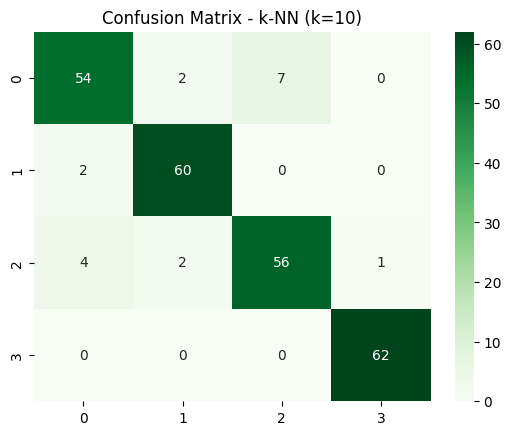

In [205]:
# Final k-NN model
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train_1)
y_pred_knn_final = knn_final.predict(X_test_scaled)

# Report
print("k-NN Classification Report:\n")
print(classification_report(y_test_1, y_pred_knn_final))
sns.heatmap(confusion_matrix(y_test_1, y_pred_knn_final), annot=True, fmt='d', cmap='Greens')
plt.title(f"Confusion Matrix - k-NN (k={best_k})")
plt.show()

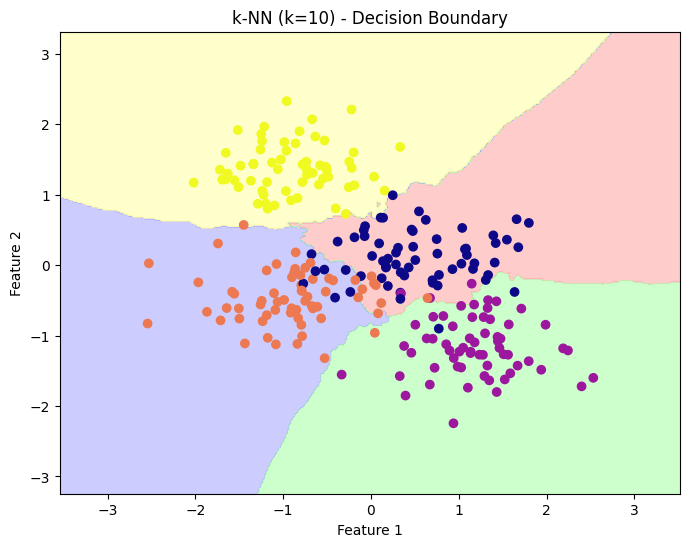

In [206]:
# Decision Boundary
plot_decision_boundary(knn_final, X_test_scaled, y_test_1, f"k-NN (k={best_k}) - Decision Boundary")

=================================================================================================================

=================================================================================================================

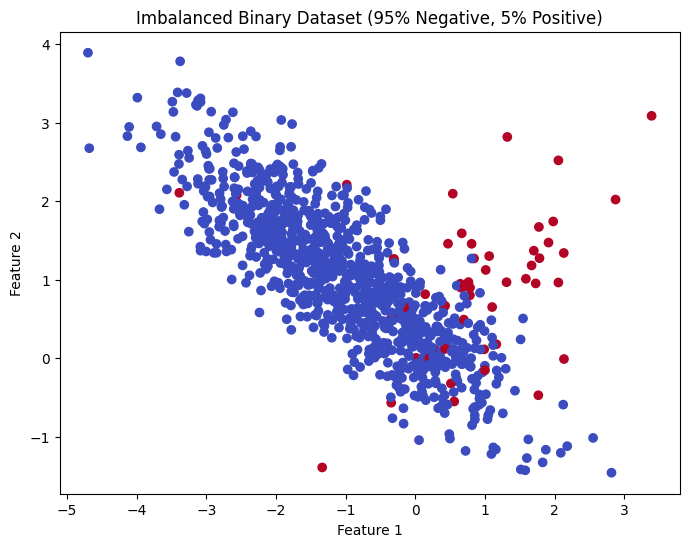

In [207]:
# Generate Dataset
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Generate 95% negative class (0) and 5% positive class (1)
X, y = make_classification(n_samples=1000, n_features=2, 
                           n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.95, 0.05]
                           )

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Imbalanced Binary Dataset (95% Negative, 5% Positive)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [208]:
#Split data and Scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [209]:
#Train Logistic Regression & k-NN
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("Logistic Regression - Classification Report (Imbalanced):\n")
print(classification_report(y_test, y_pred_log))

# k-NN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("k-NN - Classification Report (Imbalanced):\n")
print(classification_report(y_test, y_pred_knn))


Logistic Regression - Classification Report (Imbalanced):

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       234
           1       1.00      0.25      0.40        16

    accuracy                           0.95       250
   macro avg       0.98      0.62      0.69       250
weighted avg       0.95      0.95      0.94       250

k-NN - Classification Report (Imbalanced):

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       234
           1       0.71      0.31      0.43        16

    accuracy                           0.95       250
   macro avg       0.83      0.65      0.70       250
weighted avg       0.94      0.95      0.94       250



In [210]:
#Oversampling
import numpy as np
from sklearn.utils import shuffle

# Separate classes
X_majority = X_train[y_train == 0]
y_majority = y_train[y_train == 0]

X_minority = X_train[y_train == 1]
y_minority = y_train[y_train == 1]

# Repeat minority class to match majority class size
repeat_factor = len(y_majority) // len(y_minority)
X_minority_oversampled = np.tile(X_minority, (repeat_factor, 1))
y_minority_oversampled = np.tile(y_minority, repeat_factor)

# Combine and shuffle
X_balanced = np.vstack([X_majority, X_minority_oversampled])
y_balanced = np.concatenate([y_majority, y_minority_oversampled])

X_balanced, y_balanced = shuffle(X_balanced, y_balanced)

# Scale
X_balanced_scaled = scaler.fit_transform(X_balanced)

# Re-split from balanced data
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(
    X_balanced_scaled, y_balanced, test_size=0.25, stratify=y_balanced,random_state=42)


In [211]:
#Train Logistic Regression & k-NN (After Oversampling)
# Logistic Regression
lr_os = LogisticRegression()
lr_os.fit(X_train_os, y_train_os)
y_pred_lr_os = lr_os.predict(X_test_scaled)  # Still test on original test set

print("Logistic Regression - After Manual Oversampling:")
print(classification_report(y_test, y_pred_lr_os))

# k-NN
knn_os = KNeighborsClassifier(n_neighbors=5)
knn_os.fit(X_train_os, y_train_os)
y_pred_knn_os = knn_os.predict(X_test_scaled)

print("k-NN - After Manual Oversampling:")
print(classification_report(y_test, y_pred_knn_os))


Logistic Regression - After Manual Oversampling:
              precision    recall  f1-score   support

           0       1.00      0.54      0.70       234
           1       0.13      1.00      0.23        16

    accuracy                           0.57       250
   macro avg       0.56      0.77      0.46       250
weighted avg       0.94      0.57      0.67       250

k-NN - After Manual Oversampling:
              precision    recall  f1-score   support

           0       0.98      0.74      0.85       234
           1       0.18      0.81      0.29        16

    accuracy                           0.75       250
   macro avg       0.58      0.78      0.57       250
weighted avg       0.93      0.75      0.81       250



In [212]:
# After oversampling, the model got much better at catching the rare class but made more mistakes overall.
# It’s a trade-off between spotting the minority cases and keeping overall accuracy high.

=================================================================================================================

=================================================================================================================

In [213]:
##  i) Check the data by converting the built-in data set to a Pandas dataframe.

from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load data
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [214]:
##  ii) Split the data into training and test sets (a ratio of 75:25)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("target", axis=1)
y = df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [215]:
## iii) Build a Naive bayes Classifier model on the above data

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Train and evaluate
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred = nb.predict(X_test_scaled)
print("Naive Bayes - Original Dataset:\n")
print(classification_report(y_test, y_pred))

Naive Bayes - Original Dataset:

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        53
           1       0.93      0.89      0.91        90

    accuracy                           0.89       143
   macro avg       0.88      0.89      0.88       143
weighted avg       0.89      0.89      0.89       143



In [216]:
## iv) Also check the balancing of the dataset in terms of benign and malignant classes. Make use of oversampling technique to balance the dataset and then check the classification accuracy on the oversampled dataset.

import numpy as np
from sklearn.utils import shuffle

# Check class distribution
print("Original Class Distribution:\n", y_train.value_counts())

# Oversampling (if unbalanced)
class_counts = y_train.value_counts()
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()
X_majority = X_train_scaled[y_train == majority_class]
y_majority = y_train[y_train == majority_class]
X_minority = X_train_scaled[y_train == minority_class]
y_minority = y_train[y_train == minority_class]
repeat_factor = len(y_majority) // len(y_minority)

# Oversample
X_minority_oversampled = np.tile(X_minority, (repeat_factor, 1))
y_minority_oversampled = np.tile(y_minority, repeat_factor)

# Combine and shuffle
X_balanced = np.vstack([X_majority, X_minority_oversampled])
y_balanced = np.concatenate([y_majority, y_minority_oversampled])
X_balanced, y_balanced = shuffle(X_balanced, y_balanced, random_state=42)


Original Class Distribution:
 target
1    267
0    159
Name: count, dtype: int64


In [217]:
# Train 
nb_os = GaussianNB()
nb_os.fit(X_balanced, y_balanced)
y_pred_os = nb_os.predict(X_test_scaled)

print("Naive Bayes - After Oversampling:\n")
print(classification_report(y_test, y_pred_os))


Naive Bayes - After Oversampling:

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        53
           1       0.93      0.89      0.91        90

    accuracy                           0.89       143
   macro avg       0.88      0.89      0.88       143
weighted avg       0.89      0.89      0.89       143



=================================================================================================================

=================================================================================================================

In [218]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io


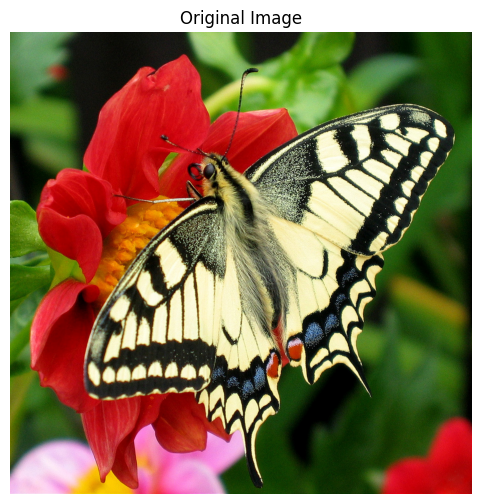

In [219]:
# Load image from URL
image_url = "https://upload.wikimedia.org/wikipedia/commons/3/3d/Fesoj_-_Papilio_machaon_%28by%29.jpg"
image = io.imread(image_url)

# Show original image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()


In [220]:
# Reshape image to (num_pixels, 3)
rows, cols, channels = image.shape
image_2d = image.reshape(-1, 3)


In [221]:
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(image_2d)

# Replace pixel colors with their cluster's center
compressed_2d = kmeans.cluster_centers_[kmeans.labels_].astype(np.uint8)

# Reshape back to original image shape
compressed_image = compressed_2d.reshape(rows, cols, channels)


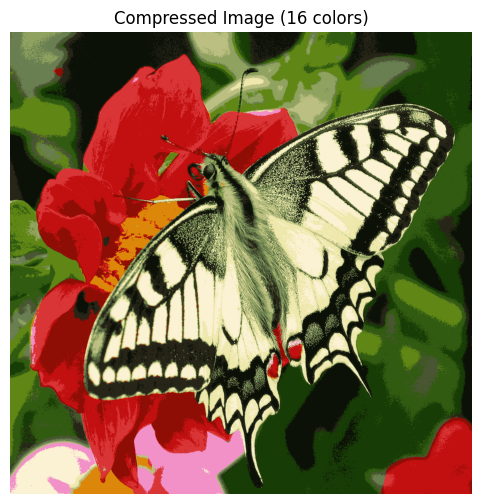

In [222]:
plt.figure(figsize=(6, 6))
plt.imshow(compressed_image)
plt.title("Compressed Image (16 colors)")
plt.axis('off')
plt.show()

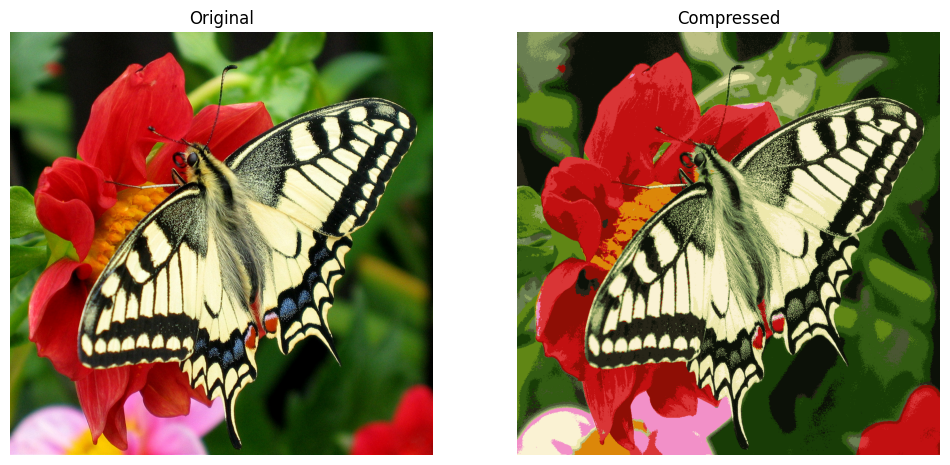

In [223]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Original")
ax[0].axis('off')
ax[1].imshow(compressed_image)
ax[1].set_title("Compressed")
ax[1].axis('off')
plt.show()
